In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Final.csv')



In [3]:
df.head()

,CustomerID,Age,Gender,MaritalStatus,IncomeLevel,TransactionID,TransactionDate,AmountSpent,ProductCategory,InteractionID,InteractionDate,InteractionType,ResolutionStatus,LastLoginDate,LoginFrequency,ServiceUsage,ChurnStatus,HasInteraction,RFM_Score,Segment
0,1,62,M,Single,Low,7194,2022-03-27,416.50,Electronics,6363.0,2022-03-31,Inquiry,Resolved,2023-10-21,34,Mobile App,0,1,144,At Risk
1,2,65,M,Married,Low,7250,2022-08-08,54.96,Clothing,3329.0,2022-03-17,Inquiry,Resolved,2023-12-05,5,Website,1,1,322,Potential Loyalist
2,2,65,M,Married,Low,9660,2022-07-25,197.50,Electronics,3329.0,2022-03-17,Inquiry,Resolved,2023-12-05,5,Website,1,1,322,Potential Loyalist
3,2,65,M,Married,Low,2998,2022-01-25,101.31,Furniture,3329.0,2022-03-17,Inquiry,Resolved,2023-12-05,5,Website,1,1,322,Potential Loyalist
4,2,65,M,Married,Low,1228,2022-07-24,397.37,Clothing,3329.0,2022-03-17,Inquiry,Resolved,2023-12-05,5,Website,1,1,322,Potential Loyalist


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6812 entries, 0 to 6811
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerID        6812 non-null   int64  
 1   Age               6812 non-null   int64  
 2   Gender            6812 non-null   object 
 3   MaritalStatus     6812 non-null   object 
 4   IncomeLevel       6812 non-null   object 
 5   TransactionID     6812 non-null   int64  
 6   TransactionDate   6812 non-null   object 
 7   AmountSpent       6812 non-null   float64
 8   ProductCategory   6812 non-null   object 
 9   InteractionID     6812 non-null   float64
 10  InteractionDate   6812 non-null   object 
 11  InteractionType   6812 non-null   object 
 12  ResolutionStatus  6812 non-null   object 
 13  LastLoginDate     6812 non-null   object 
 14  LoginFrequency    6812 non-null   int64  
 15  ServiceUsage      6812 non-null   object 
 16  ChurnStatus       6812 non-null   int64  


In [5]:
import pandas as pd

# Convert to datetime
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])
df['InteractionDate'] = pd.to_datetime(df['InteractionDate'])
df['LastLoginDate'] = pd.to_datetime(df['LastLoginDate'])

# Convert to categorical
categorical_cols = ['Gender', 'MaritalStatus', 'IncomeLevel', 'ProductCategory',
                    'InteractionType', 'ResolutionStatus', 'ServiceUsage', 'Segment']
df[categorical_cols] = df[categorical_cols].astype('category')


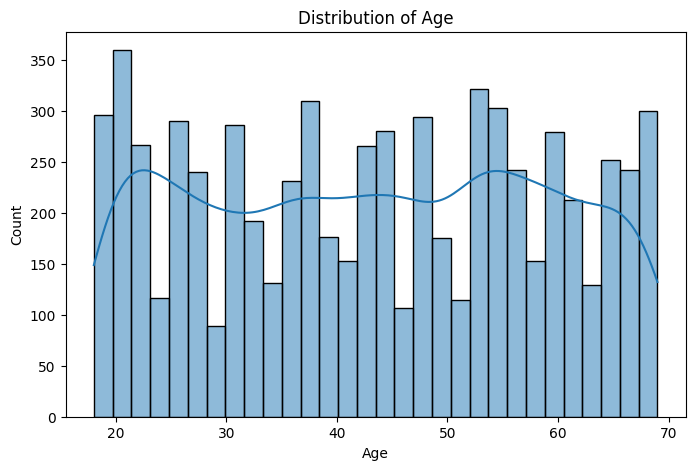

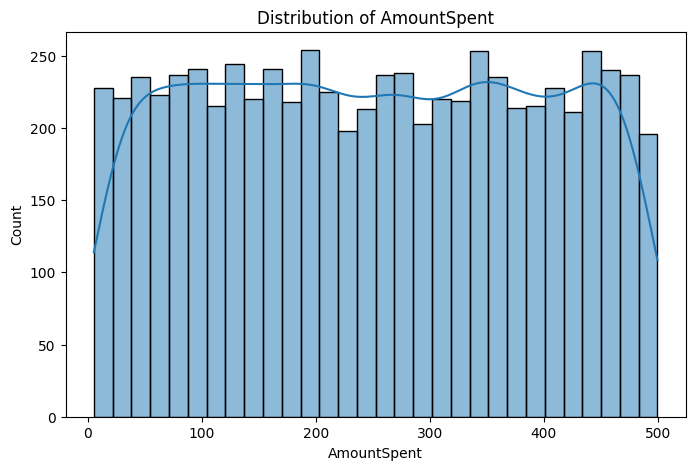

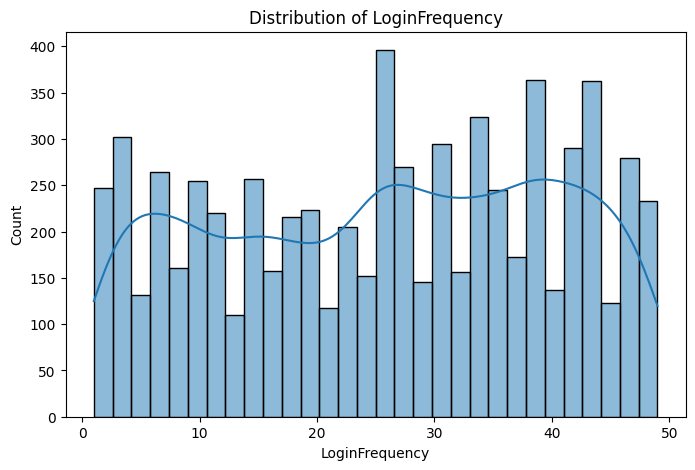

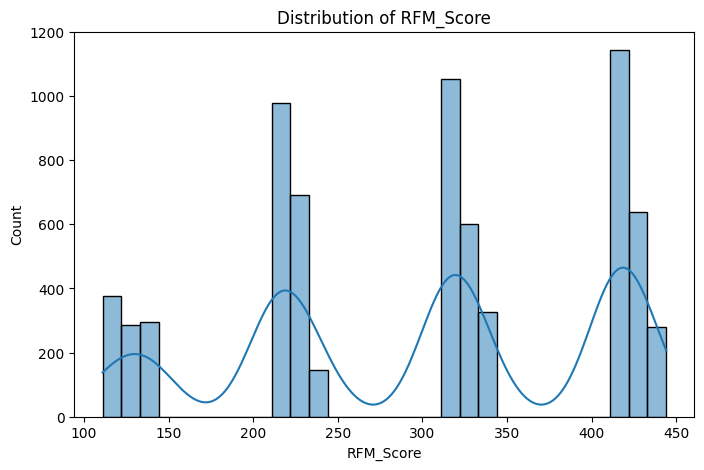

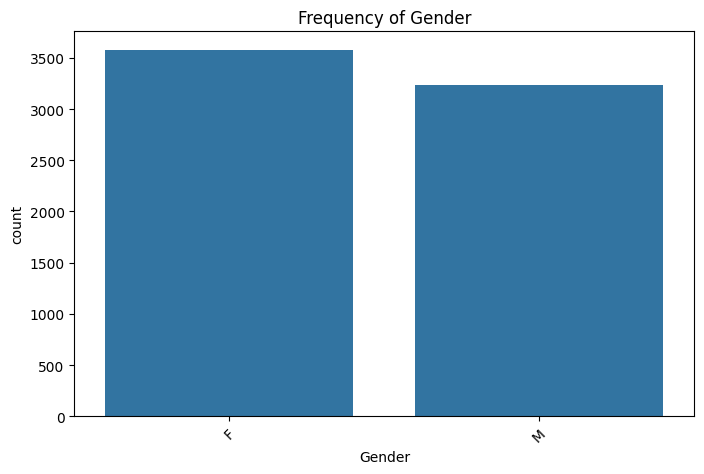

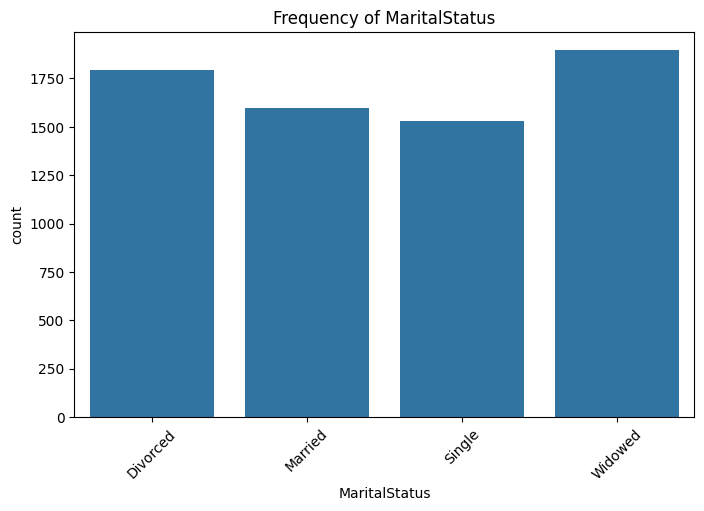

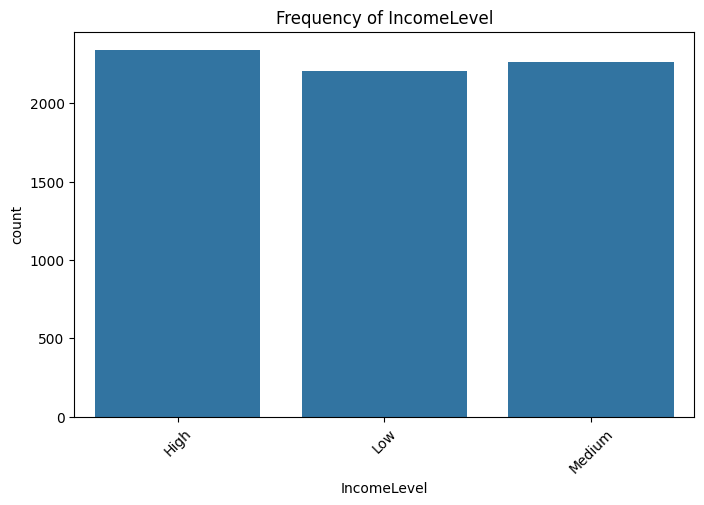

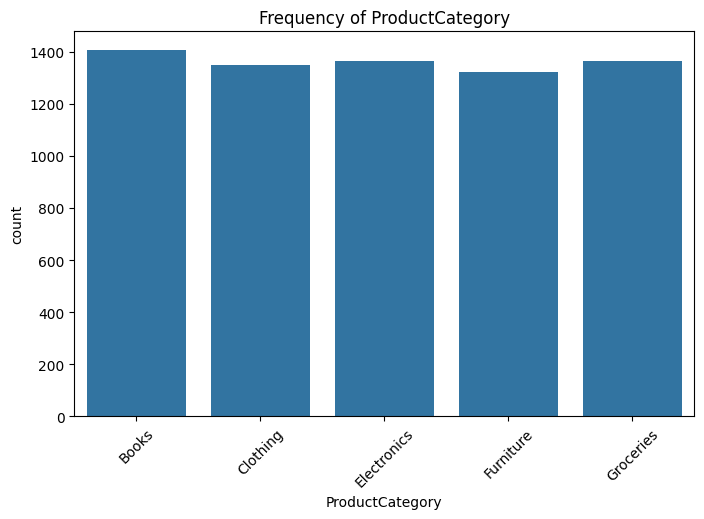

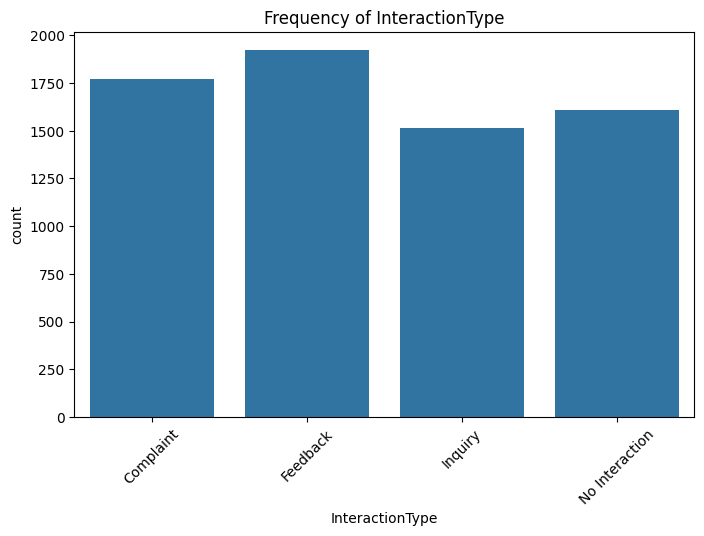

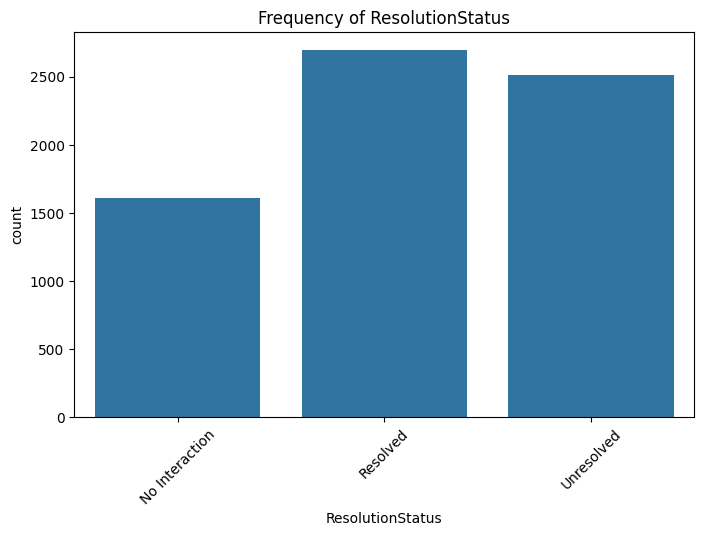

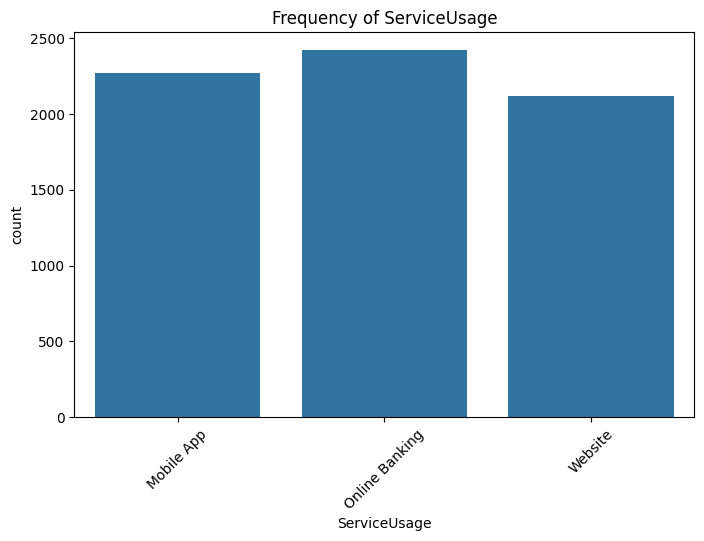

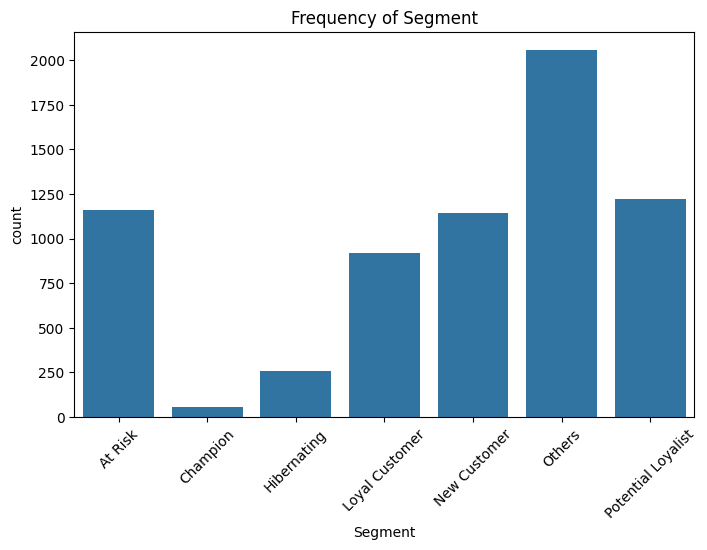

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Numerical distribution
numerical_cols = ['Age', 'AmountSpent', 'LoginFrequency', 'RFM_Score']
for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.show()

# Categorical distribution
for col in categorical_cols:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, x=col)
    plt.title(f"Frequency of {col}")
    plt.xticks(rotation=45)
    plt.show()


In [7]:
from scipy.stats import zscore

# Detect outliers using Z-score
threshold = 3  # Z-score threshold
for col in numerical_cols:
    z_scores = zscore(df[col])
    outliers = df[abs(z_scores) > threshold]
    print(f"Outliers in {col}:\n", outliers)

Outliers in Age:
 Empty DataFrame
Columns: [CustomerID, Age, Gender, MaritalStatus, IncomeLevel, TransactionID, TransactionDate, AmountSpent, ProductCategory, InteractionID, InteractionDate, InteractionType, ResolutionStatus, LastLoginDate, LoginFrequency, ServiceUsage, ChurnStatus, HasInteraction, RFM_Score, Segment]
Index: []
Outliers in AmountSpent:
 Empty DataFrame
Columns: [CustomerID, Age, Gender, MaritalStatus, IncomeLevel, TransactionID, TransactionDate, AmountSpent, ProductCategory, InteractionID, InteractionDate, InteractionType, ResolutionStatus, LastLoginDate, LoginFrequency, ServiceUsage, ChurnStatus, HasInteraction, RFM_Score, Segment]
Index: []
Outliers in LoginFrequency:
 Empty DataFrame
Columns: [CustomerID, Age, Gender, MaritalStatus, IncomeLevel, TransactionID, TransactionDate, AmountSpent, ProductCategory, InteractionID, InteractionDate, InteractionType, ResolutionStatus, LastLoginDate, LoginFrequency, ServiceUsage, ChurnStatus, HasInteraction, RFM_Score, Segment]
I

In [8]:
# Check for missing values
missing_data = df.isnull().sum()
print("Missing values per column:\n", missing_data)

# For categorical columns, check for unexpected placeholders like 'Unknown', 'NA', etc.
for col in categorical_cols:
    print(f"Unique values in {col}:\n", df[col].unique())


Missing values per column:
 CustomerID          0
Age                 0
Gender              0
MaritalStatus       0
IncomeLevel         0
TransactionID       0
TransactionDate     0
AmountSpent         0
ProductCategory     0
InteractionID       0
InteractionDate     0
InteractionType     0
ResolutionStatus    0
LastLoginDate       0
LoginFrequency      0
ServiceUsage        0
ChurnStatus         0
HasInteraction      0
RFM_Score           0
Segment             0
dtype: int64
Unique values in Gender:
 ['M', 'F']
Categories (2, object): ['F', 'M']
Unique values in MaritalStatus:
 ['Single', 'Married', 'Widowed', 'Divorced']
Categories (4, object): ['Divorced', 'Married', 'Single', 'Widowed']
Unique values in IncomeLevel:
 ['Low', 'Medium', 'High']
Categories (3, object): ['High', 'Low', 'Medium']
Unique values in ProductCategory:
 ['Electronics', 'Clothing', 'Furniture', 'Groceries', 'Books']
Categories (5, object): ['Books', 'Clothing', 'Electronics', 'Furniture', 'Groceries']
Unique v

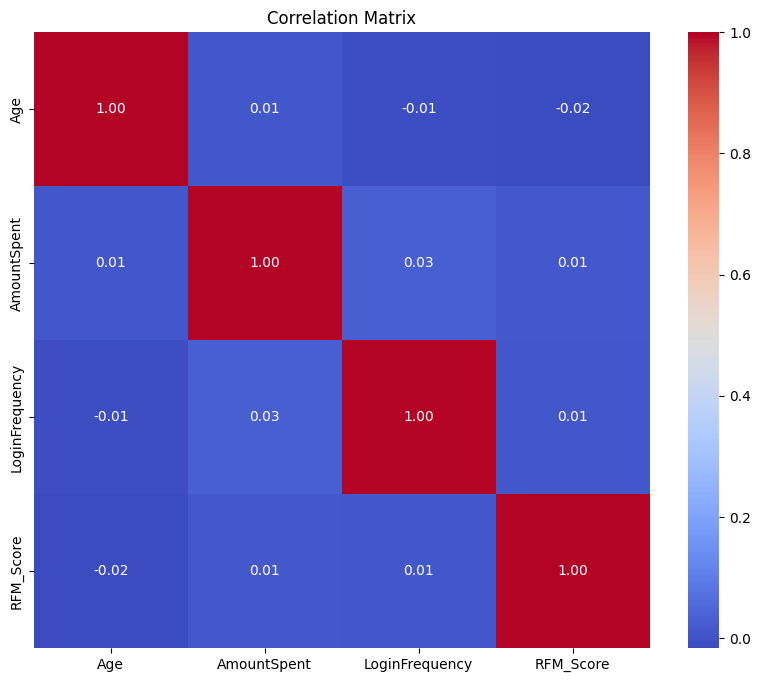

In [9]:
# Correlation heatmap
import numpy as np

plt.figure(figsize=(10, 8))
corr = df[numerical_cols].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", square=True)
plt.title("Correlation Matrix")
plt.show()


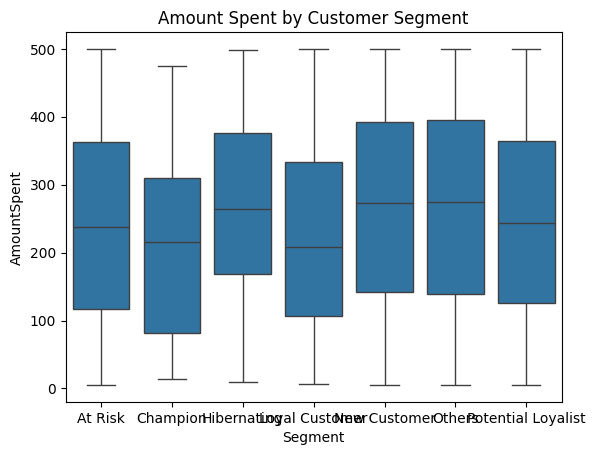

In [10]:
sns.boxplot(data=df, x='Segment', y='AmountSpent')
plt.title("Amount Spent by Customer Segment")
plt.show()


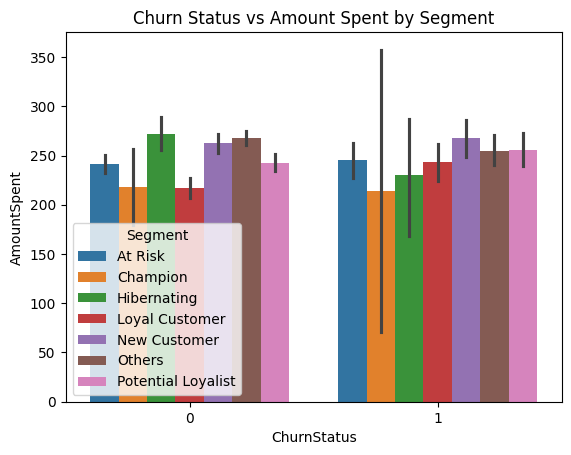

In [11]:
sns.barplot(data=df, x='ChurnStatus', y='AmountSpent', hue='Segment')
plt.title("Churn Status vs Amount Spent by Segment")
plt.show()


In [12]:
df.head()

,CustomerID,Age,Gender,MaritalStatus,IncomeLevel,TransactionID,TransactionDate,AmountSpent,ProductCategory,InteractionID,InteractionDate,InteractionType,ResolutionStatus,LastLoginDate,LoginFrequency,ServiceUsage,ChurnStatus,HasInteraction,RFM_Score,Segment
0,1,62,M,Single,Low,7194,2022-03-27,416.50,Electronics,6363.0,2022-03-31,Inquiry,Resolved,2023-10-21,34,Mobile App,0,1,144,At Risk
1,2,65,M,Married,Low,7250,2022-08-08,54.96,Clothing,3329.0,2022-03-17,Inquiry,Resolved,2023-12-05,5,Website,1,1,322,Potential Loyalist
2,2,65,M,Married,Low,9660,2022-07-25,197.50,Electronics,3329.0,2022-03-17,Inquiry,Resolved,2023-12-05,5,Website,1,1,322,Potential Loyalist
3,2,65,M,Married,Low,2998,2022-01-25,101.31,Furniture,3329.0,2022-03-17,Inquiry,Resolved,2023-12-05,5,Website,1,1,322,Potential Loyalist
4,2,65,M,Married,Low,1228,2022-07-24,397.37,Clothing,3329.0,2022-03-17,Inquiry,Resolved,2023-12-05,5,Website,1,1,322,Potential Loyalist


In [13]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Function to calculate WOE and IV
def calculate_woe_iv(df, feature, target):
    # Create a dataframe for the feature and target
    data = df[[feature, target]].copy()

    # Calculate the number of events (churn=1) and non-events (churn=0)
    event = data[target].sum()
    non_event = len(data) - event

    # Calculate the distribution of event and non-event by feature category
    dist = data.groupby(feature)[target].agg(['count', 'sum'])
    dist['non_event'] = dist['count'] - dist['sum']
    dist['event_dist'] = dist['sum'] / event
    dist['non_event_dist'] = dist['non_event'] / non_event

    # Add a small constant to avoid division by zero errors in WOE calculation
    dist['event_dist'] = dist['event_dist'].replace(0, 1e-6)
    dist['non_event_dist'] = dist['non_event_dist'].replace(0, 1e-6)

    # Calculate WOE and IV
    dist['woe'] = np.log(dist['non_event_dist'] / dist['event_dist'])
    dist['iv'] = (dist['non_event_dist'] - dist['event_dist']) * dist['woe']

    iv = dist['iv'].sum()
    print(f"IV for {feature}: {iv}")

    return dist[['woe', 'iv']], iv

# Function to calculate VIF
def calculate_vif(df, numerical_cols):
    # Add a constant to the dataframe for VIF calculation
    X_vif = df[numerical_cols]
    X_vif = add_constant(X_vif)

    # Calculate VIF
    vif_data = pd.DataFrame()
    vif_data["Feature"] = X_vif.columns
    vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

    return vif_data

# Main Script
# Assume `df` is your DataFrame
categorical_cols = ['Gender', 'MaritalStatus', 'IncomeLevel', 'ProductCategory', 'InteractionType', 'ResolutionStatus', 'ServiceUsage', 'Segment']
target_col = 'ChurnStatus'

# Calculate WOE and IV for categorical columns
iv_table = {}
woe_dicts = {}

for col in categorical_cols:
    woe_iv, iv = calculate_woe_iv(df, col, target_col)
    iv_table[col] = iv
    woe_dicts[col] = woe_iv['woe'].to_dict()

# Display the IV table
iv_table_df = pd.DataFrame(list(iv_table.items()), columns=['Feature', 'IV'])
print(iv_table_df)

# Replace categorical variables with WOE values
for col in categorical_cols:
    df[col] = df[col].map(woe_dicts[col])

# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

# Select numerical columns for VIF calculation
numerical_cols_vif = ['Age', 'AmountSpent', 'LoginFrequency', 'RFM_Score'] + categorical_cols
vif_results = calculate_vif(df, numerical_cols_vif)
print(vif_results)

# Display the first few rows of the updated DataFrame
print(df.head())


<ipython-input-13-cd50333b8dc3>:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dist = data.groupby(feature)[target].agg(['count', 'sum'])
<ipython-input-13-cd50333b8dc3>:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dist = data.groupby(feature)[target].agg(['count', 'sum'])
<ipython-input-13-cd50333b8dc3>:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dist = data.groupby(feature)[target].agg(['count', 'sum'])
<

IV for Gender: 0.010142979171353882
IV for MaritalStatus: 0.008478179303088142
IV for IncomeLevel: 0.016378581219734806
IV for ProductCategory: 0.006691845002401748
IV for InteractionType: 0.00783524868269695
IV for ResolutionStatus: 0.007537404263767779
IV for ServiceUsage: 0.02794746235028865


<ipython-input-13-cd50333b8dc3>:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dist = data.groupby(feature)[target].agg(['count', 'sum'])


IV for Segment: 0.05220059241820505
            Feature        IV
0            Gender  0.010143
1     MaritalStatus  0.008478
2       IncomeLevel  0.016379
3   ProductCategory  0.006692
4   InteractionType  0.007835
5  ResolutionStatus  0.007537
6      ServiceUsage  0.027947
7           Segment  0.052201
Missing Values:
 CustomerID          0
Age                 0
Gender              0
MaritalStatus       0
IncomeLevel         0
TransactionID       0
TransactionDate     0
AmountSpent         0
ProductCategory     0
InteractionID       0
InteractionDate     0
InteractionType     0
ResolutionStatus    0
LastLoginDate       0
LoginFrequency      0
ServiceUsage        0
ChurnStatus         0
HasInteraction      0
RFM_Score           0
Segment             0
dtype: int64
             Feature        VIF
0              const  24.704083
1                Age   1.006913
2        AmountSpent   1.007208
3     LoginFrequency   1.012485
4          RFM_Score   1.078874
5             Gender   1.020578


In [14]:
df.head()

,CustomerID,Age,Gender,MaritalStatus,IncomeLevel,TransactionID,TransactionDate,AmountSpent,ProductCategory,InteractionID,InteractionDate,InteractionType,ResolutionStatus,LastLoginDate,LoginFrequency,ServiceUsage,ChurnStatus,HasInteraction,RFM_Score,Segment
0,1,62,-0.10287,-0.114261,-0.107504,7194,2022-03-27,416.50,-0.136500,6363.0,2022-03-31,-0.014516,-0.054001,2023-10-21,34,-0.170607,0,1,144,-0.124159
1,2,65,-0.10287,-0.078668,-0.107504,7250,2022-08-08,54.96,0.074130,3329.0,2022-03-17,-0.014516,-0.054001,2023-12-05,5,0.245613,1,1,322,-0.146257
2,2,65,-0.10287,-0.078668,-0.107504,9660,2022-07-25,197.50,-0.136500,3329.0,2022-03-17,-0.014516,-0.054001,2023-12-05,5,0.245613,1,1,322,-0.146257
3,2,65,-0.10287,-0.078668,-0.107504,2998,2022-01-25,101.31,-0.038584,3329.0,2022-03-17,-0.014516,-0.054001,2023-12-05,5,0.245613,1,1,322,-0.146257
4,2,65,-0.10287,-0.078668,-0.107504,1228,2022-07-24,397.37,0.074130,3329.0,2022-03-17,-0.014516,-0.054001,2023-12-05,5,0.245613,1,1,322,-0.146257


In [15]:
df.drop(columns=['InteractionType', 'ResolutionStatus'], inplace=True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6812 entries, 0 to 6811
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   CustomerID       6812 non-null   int64         
 1   Age              6812 non-null   int64         
 2   Gender           6812 non-null   category      
 3   MaritalStatus    6812 non-null   category      
 4   IncomeLevel      6812 non-null   category      
 5   TransactionID    6812 non-null   int64         
 6   TransactionDate  6812 non-null   datetime64[ns]
 7   AmountSpent      6812 non-null   float64       
 8   ProductCategory  6812 non-null   category      
 9   InteractionID    6812 non-null   float64       
 10  InteractionDate  6812 non-null   datetime64[ns]
 11  LastLoginDate    6812 non-null   datetime64[ns]
 12  LoginFrequency   6812 non-null   int64         
 13  ServiceUsage     6812 non-null   category      
 14  ChurnStatus      6812 non-null   int64  

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [23:44:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.58      0.69      1638
           1       0.25      0.57      0.35       406

    accuracy                           0.58      2044
   macro avg       0.55      0.58      0.52      2044
weighted avg       0.73      0.58      0.62      2044

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1638
           1       0.93      0.98      0.95       406

    accuracy                           0.98      2044
   macro avg       0.96      0.98      0.97      2044
weighted avg       0.98      0.98      0.98      2044



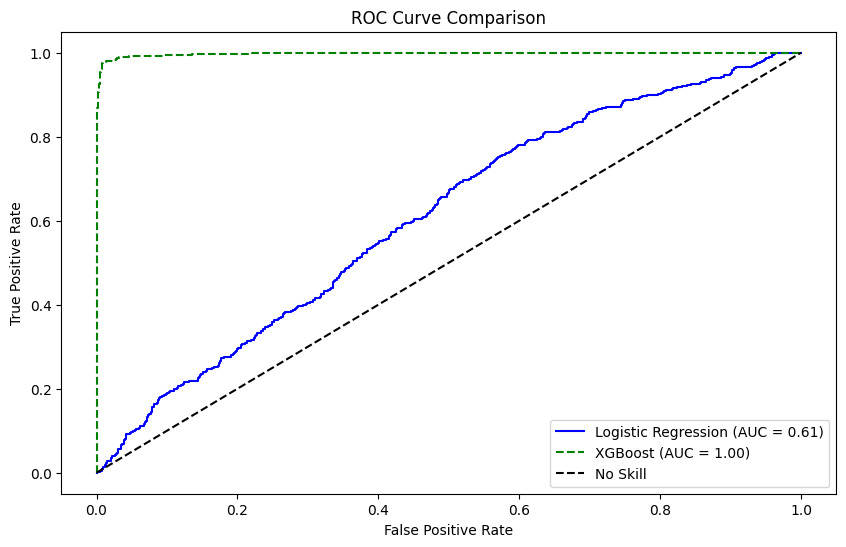

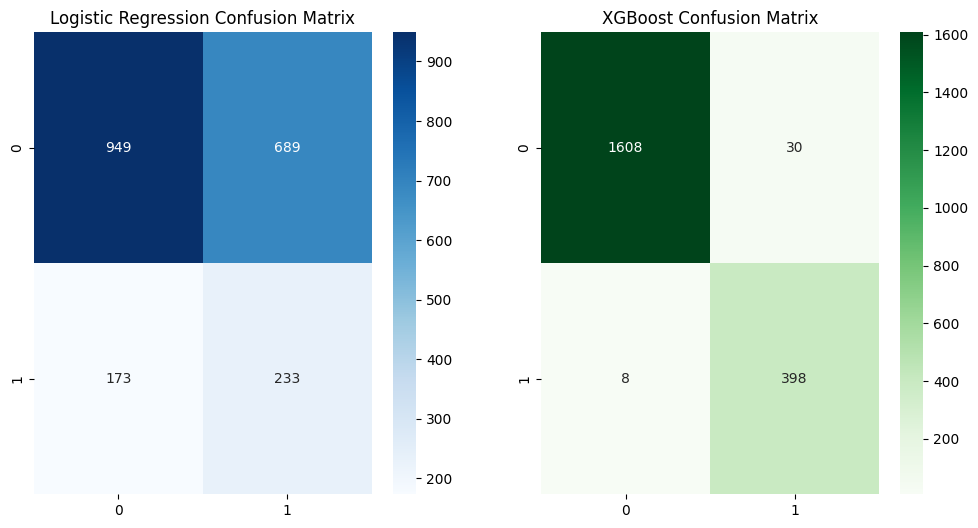

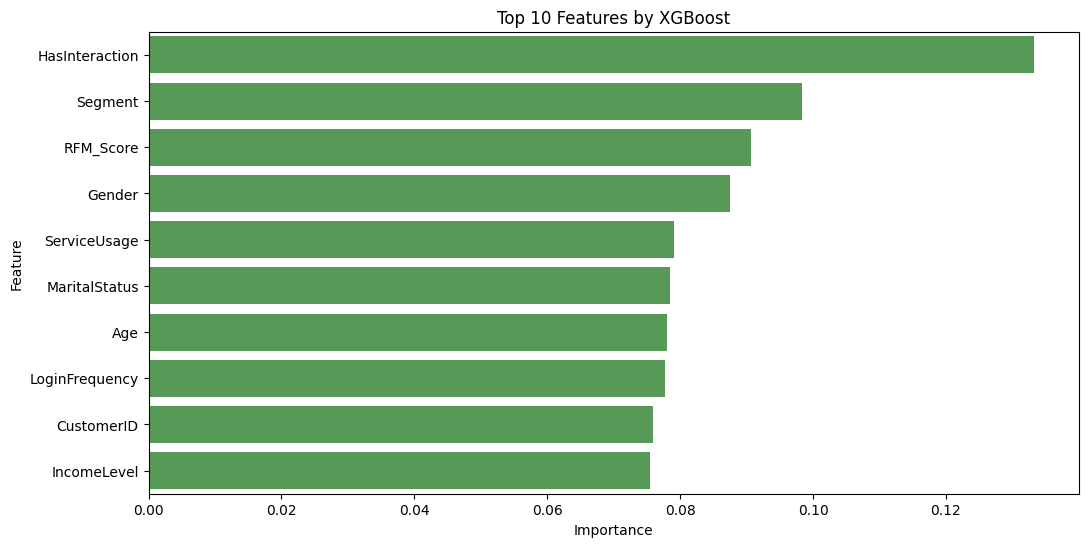

In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score)
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

# Drop datetime columns and prepare features/target
# df = df.drop(columns=['TransactionDate', 'InteractionDate', 'LastLoginDate'])
X = df.drop(columns=['ChurnStatus'])
y = df['ChurnStatus']

# Handle missing values (if any)
imputer = SimpleImputer(strategy='mean')  # or 'median', 'most_frequent' based on your data
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.3, random_state=42, stratify=y)

# Scale numerical features
numerical_features = X_train.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

# Logistic Regression
log_reg = LogisticRegression(random_state=42, class_weight='balanced')
log_reg.fit(X_train, y_train)
y_pred_logreg = log_reg.predict(X_test)
y_pred_proba_logreg = log_reg.predict_proba(X_test)[:, 1]

# XGBoost
xgb_model = XGBClassifier(
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss',
    scale_pos_weight=len(y_train) / sum(y_train),
    learning_rate=0.1,
    max_depth=6,
    n_estimators=100
)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
y_pred_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]

# Feature Importance
xgb_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': xgb_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Evaluation Metrics
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_logreg))
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))

# Confusion Matrices
conf_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)

# ROC-AUC Scores
roc_auc_logreg = roc_auc_score(y_test, y_pred_proba_logreg)
roc_auc_xgb = roc_auc_score(y_test, y_pred_proba_xgb)

# Plot ROC Curve
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_pred_proba_logreg)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_pred_proba_xgb)

plt.figure(figsize=(10, 6))
plt.plot(fpr_logreg, tpr_logreg, label=f'Logistic Regression (AUC = {roc_auc_logreg:.2f})', linestyle='-', color='blue')
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {roc_auc_xgb:.2f})', linestyle='--', color='green')
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.title('ROC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# Confusion Matrix Heatmaps
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.heatmap(conf_matrix_logreg, annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title('Logistic Regression Confusion Matrix')
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='Greens', ax=ax[1])
ax[1].set_title('XGBoost Confusion Matrix')
plt.show()

# Feature Importance Plot for XGBoost
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=xgb_importance.head(20), color='green', alpha=0.7)
plt.title('Top 10 Features by XGBoost')
plt.show()


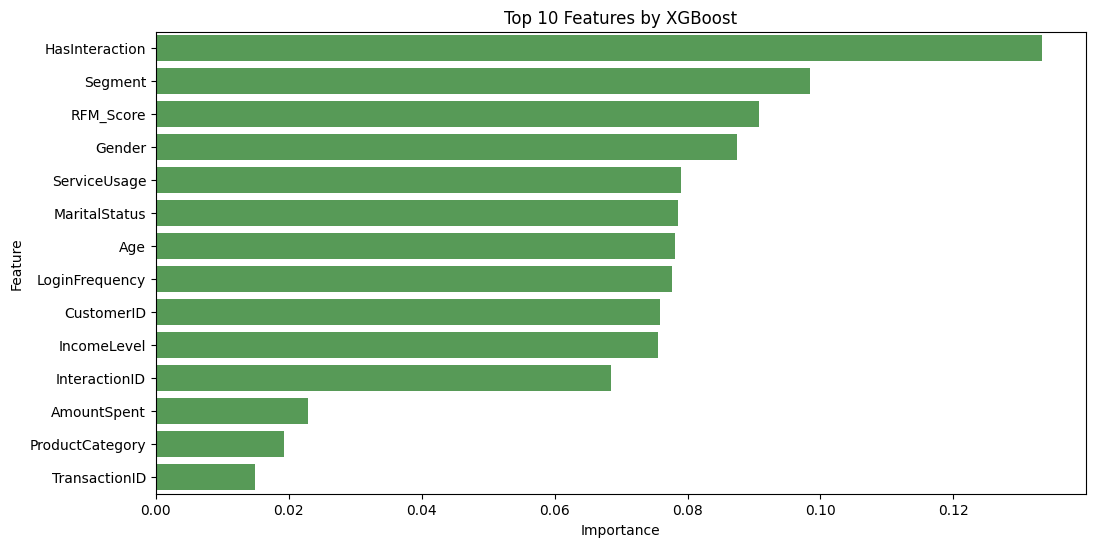

In [26]:
# Feature Importance Plot for XGBoost
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=xgb_importance.head(20), color='green', alpha=0.7)
plt.title('Top 10 Features by XGBoost')
plt.show()


In [33]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (classification_report, confusion_matrix, roc_auc_score, roc_curve)
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

# Assuming df is your DataFrame and 'ChurnStatus' is your target column
X = df.drop(columns=['ChurnStatus'])
y = df['ChurnStatus']

# Handle missing values (if any)
imputer = SimpleImputer(strategy='mean')  # or 'median', 'most_frequent' based on your data
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.3, random_state=42, stratify=y)

# Scale numerical features
numerical_features = X_train.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

# XGBoost with early stopping and adjusted scale_pos_weight
scale_pos_weight = len(y_train) / (2 * sum(y_train))  # Adjust scale_pos_weight
evals = [(X_train, y_train), (X_test, y_test)]

# XGBClassifier with early stopping properly configured
xgb_model = XGBClassifier(
    random_state=42,
    use_label_encoder=False,
    learning_rate=0.01,  # Lower learning rate
    max_depth=4,         # Reduce max_depth to avoid overfitting
    n_estimators=100,
    scale_pos_weight=scale_pos_weight,
    eval_metric="logloss"  # Setting the evaluation metric
)

# Fit the model with early stopping
xgb_model.fit(X_train, y_train,
              eval_metric="logloss",
              eval_set=evals,
              verbose=True,
              early_stopping_rounds=10)

y_pred_xgb = xgb_model.predict(X_test)
y_pred_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]

# Evaluation Metrics
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))

# Confusion Matrix
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)

# ROC-AUC Score
roc_auc_xgb = roc_auc_score(y_test, y_pred_proba_xgb)

# Plot ROC Curve
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_pred_proba_xgb)

plt.figure(figsize=(10, 6))
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {roc_auc_xgb:.2f})', linestyle='--', color='green')
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.title('ROC Curve - XGBoost')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# Confusion Matrix Heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='Greens')
plt.title('XGBoost Confusion Matrix')
plt.show()

# Feature Importance Plot for XGBoost
xgb_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': xgb_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=xgb_importance.head(20), color='green', alpha=0.7)
plt.title('Top 10 Features by XGBoost')
plt.show()

# Output AUC Score
print("XGBoost AUC:", roc_auc_xgb)


TypeError: XGBClassifier.fit() got an unexpected keyword argument 'eval_metric'

[0]	validation_0-logloss:0.57874	validation_1-logloss:0.57886
[1]	validation_0-logloss:0.57751	validation_1-logloss:0.57764


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [23:59:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[2]	validation_0-logloss:0.57631	validation_1-logloss:0.57645
[3]	validation_0-logloss:0.57513	validation_1-logloss:0.57528
[4]	validation_0-logloss:0.57395	validation_1-logloss:0.57412
[5]	validation_0-logloss:0.57281	validation_1-logloss:0.57300
[6]	validation_0-logloss:0.57167	validation_1-logloss:0.57188
[7]	validation_0-logloss:0.57057	validation_1-logloss:0.57081
[8]	validation_0-logloss:0.56947	validation_1-logloss:0.56972
[9]	validation_0-logloss:0.56842	validation_1-logloss:0.56873
[10]	validation_0-logloss:0.56737	validation_1-logloss:0.56771
[11]	validation_0-logloss:0.56635	validation_1-logloss:0.56675
[12]	validation_0-logloss:0.56533	validation_1-logloss:0.56575
[13]	validation_0-logloss:0.56434	validation_1-logloss:0.56487
[14]	validation_0-logloss:0.56333	validation_1-logloss:0.56388
[15]	validation_0-logloss:0.56238	validation_1-logloss:0.56297
[16]	validation_0-logloss:0.56142	validation_1-logloss:0.56204
[17]	validation_0-logloss:0.56049	validation_1-logloss:0.56122


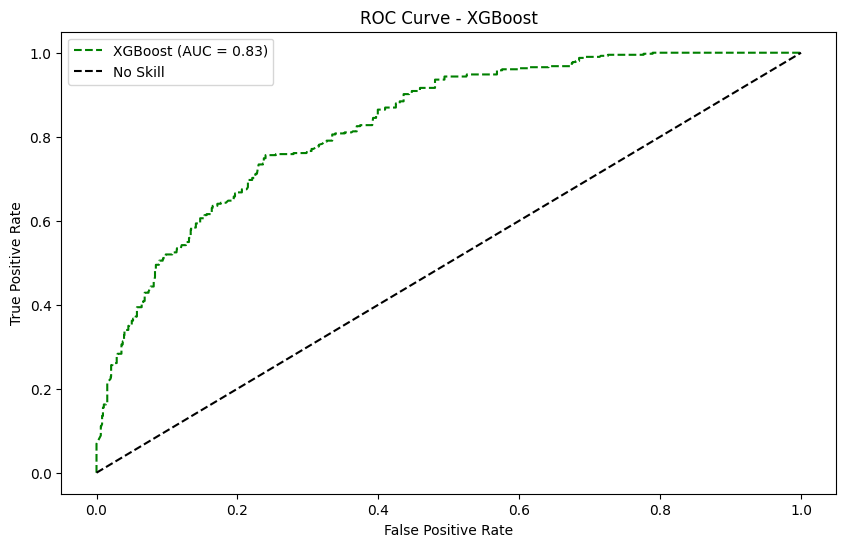

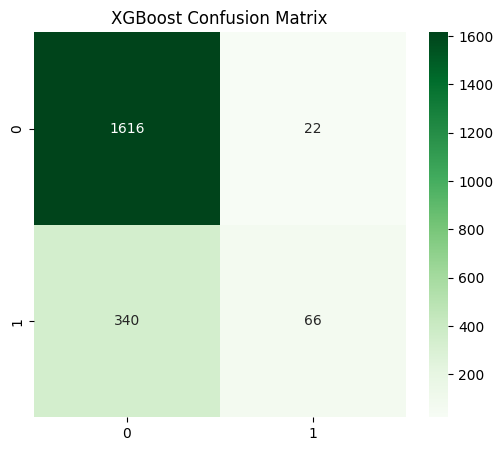

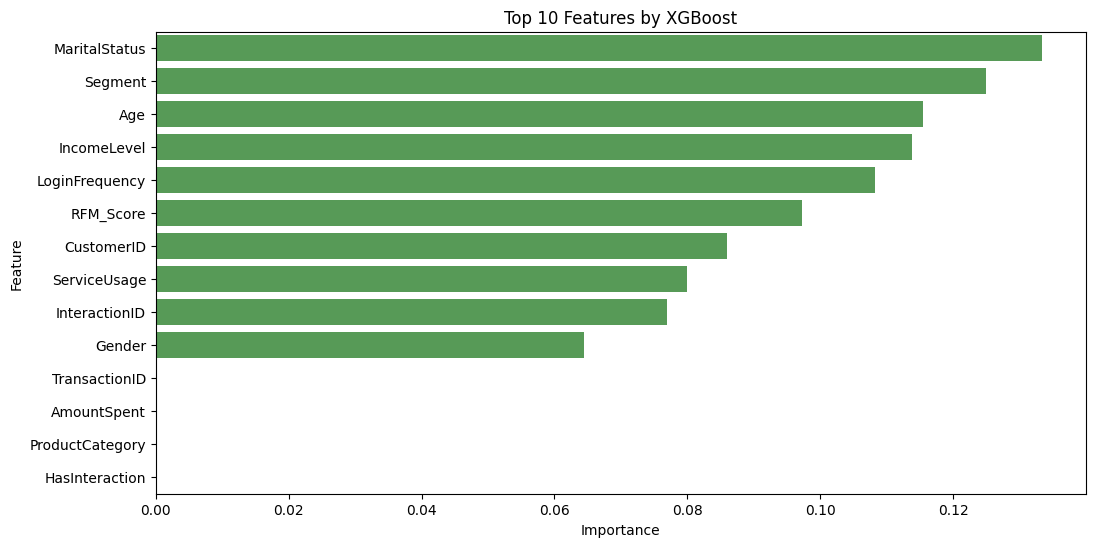

XGBoost AUC: 0.829513945277492


In [35]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (classification_report, confusion_matrix, roc_auc_score, roc_curve)
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

# Assuming df is your DataFrame and 'ChurnStatus' is your target column
X = df.drop(columns=['ChurnStatus'])
y = df['ChurnStatus']

# Handle missing values (if any)
imputer = SimpleImputer(strategy='mean')  # or 'median', 'most_frequent' based on your data
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.3, random_state=42, stratify=y)

# Scale numerical features
numerical_features = X_train.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

# XGBoost with adjusted scale_pos_weight
scale_pos_weight = len(y_train) / (2 * sum(y_train))  # Adjust scale_pos_weight
evals = [(X_train, y_train), (X_test, y_test)]

# XGBClassifier without early stopping
xgb_model = XGBClassifier(
    random_state=42,
    use_label_encoder=False,
    learning_rate=0.01,  # Lower learning rate
    max_depth=4,         # Reduce max_depth to avoid overfitting
    n_estimators=100,
    scale_pos_weight=scale_pos_weight
)

# Fit the model without early stopping
xgb_model.fit(X_train, y_train, eval_set=evals, verbose=True)

y_pred_xgb = xgb_model.predict(X_test)
y_pred_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]

# Evaluation Metrics
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))

# Confusion Matrix
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)

# ROC-AUC Score
roc_auc_xgb = roc_auc_score(y_test, y_pred_proba_xgb)

# Plot ROC Curve
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_pred_proba_xgb)

plt.figure(figsize=(10, 6))
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {roc_auc_xgb:.2f})', linestyle='--', color='green')
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.title('ROC Curve - XGBoost')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# Confusion Matrix Heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='Greens')
plt.title('XGBoost Confusion Matrix')
plt.show()

# Feature Importance Plot for XGBoost
xgb_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': xgb_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=xgb_importance.head(20), color='green', alpha=0.7)
plt.title('Top 10 Features by XGBoost')
plt.show()

# Output AUC Score
print("XGBoost AUC:", roc_auc_xgb)


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [00:01:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      1638
           1       0.84      0.72      0.78       406

    accuracy                           0.92      2044
   macro avg       0.89      0.84      0.86      2044
weighted avg       0.92      0.92      0.92      2044



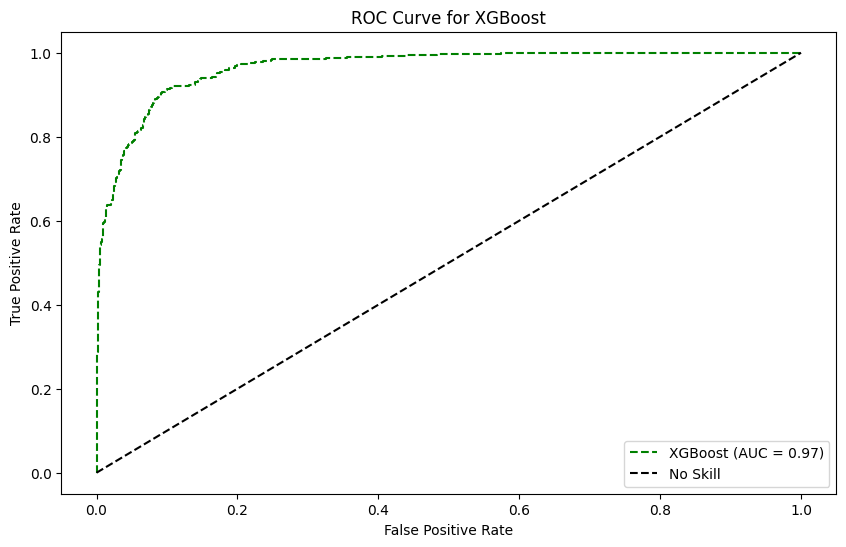

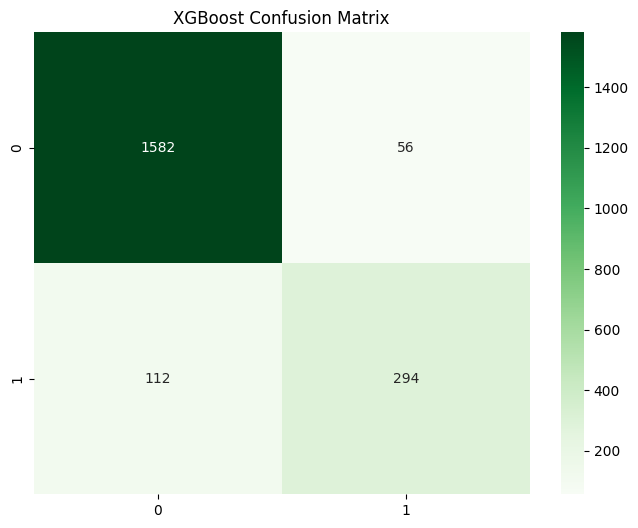

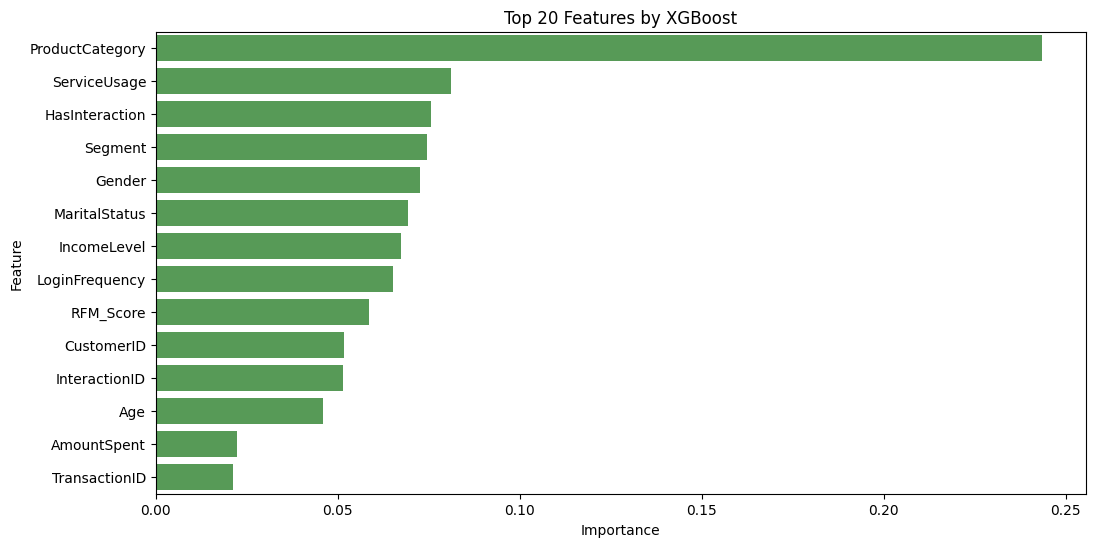

XGBoost ROC AUC: 0.9655788929187944
XGBoost Precision-Recall AUC: 0.8923243489825422


In [36]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score, average_precision_score
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE

# Drop datetime columns and prepare features/target
# df = df.drop(columns=['TransactionDate', 'InteractionDate', 'LastLoginDate'])
X = df.drop(columns=['ChurnStatus'])
y = df['ChurnStatus']

# Handle missing values (if any)
imputer = SimpleImputer(strategy='mean')  # or 'median', 'most_frequent' based on your data
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.3, random_state=42, stratify=y)

# Scale numerical features
numerical_features = X_train.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

# Handle class imbalance with SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# XGBoost with scale_pos_weight adjusted
scale_pos_weight = len(y_train_resampled) / (2 * sum(y_train_resampled))  # Adjust scale_pos_weight

# Initialize XGBClassifier
xgb_model = XGBClassifier(
    random_state=42,
    use_label_encoder=False,
    learning_rate=0.05,  # Lower learning rate for better convergence
    max_depth=5,         # Adjust depth to avoid overfitting
    n_estimators=200,    # Increase number of trees for better performance
    scale_pos_weight=scale_pos_weight,
    eval_metric="logloss"  # Setting the evaluation metric
)

# Fit the model
xgb_model.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)
y_pred_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]

# Feature Importance
xgb_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': xgb_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Evaluation Metrics
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))

# Confusion Matrix
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)

# ROC-AUC Score
roc_auc_xgb = roc_auc_score(y_test, y_pred_proba_xgb)

# Precision-Recall AUC
pr_auc_xgb = average_precision_score(y_test, y_pred_proba_xgb)

# Plot ROC Curve
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_pred_proba_xgb)

plt.figure(figsize=(10, 6))
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {roc_auc_xgb:.2f})', linestyle='--', color='green')
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.title('ROC Curve for XGBoost')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# Confusion Matrix Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='Greens')
plt.title('XGBoost Confusion Matrix')
plt.show()

# Feature Importance Plot for XGBoost
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=xgb_importance.head(20), color='green', alpha=0.7)
plt.title('Top 20 Features by XGBoost')
plt.show()

# Output AUC Scores and Precision-Recall AUC
print("XGBoost ROC AUC:", roc_auc_xgb)
print("XGBoost Precision-Recall AUC:", pr_auc_xgb)


Fitting 3 folds for each of 36 candidates, totalling 108 fits


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [00:05:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best parameters found:  {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 5, 'subsample': 0.8}


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [00:05:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Tuned XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1638
           1       0.98      0.73      0.84       406

    accuracy                           0.94      2044
   macro avg       0.96      0.86      0.90      2044
weighted avg       0.95      0.94      0.94      2044



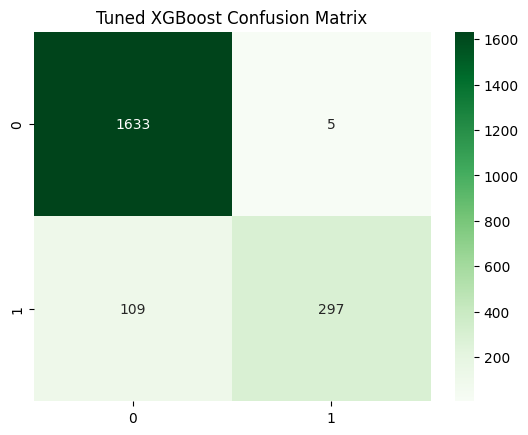

Tuned XGBoost AUC: 0.99


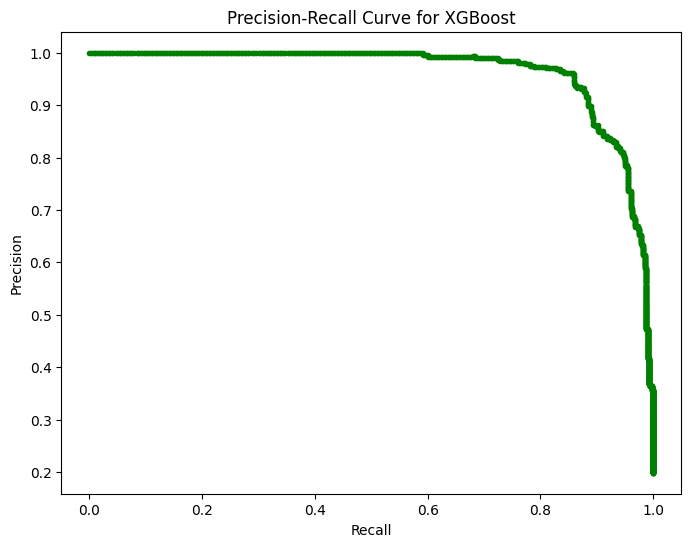

In [37]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# GridSearchCV for XGBoost
grid_search = GridSearchCV(estimator=XGBClassifier(random_state=42, use_label_encoder=False),
                           param_grid=param_grid,
                           scoring='roc_auc',
                           cv=3,
                           n_jobs=-1,
                           verbose=1)

# Fit the grid search
grid_search.fit(X_train, y_train)

# Best hyperparameters found
print("Best parameters found: ", grid_search.best_params_)

# Train model with the best parameters
best_xgb_model = grid_search.best_estimator_
best_xgb_model.fit(X_train, y_train)

# Predict with the best model
y_pred_xgb_best = best_xgb_model.predict(X_test)
y_pred_proba_xgb_best = best_xgb_model.predict_proba(X_test)[:, 1]

# Evaluation metrics for the tuned model
print("Tuned XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb_best))

# Confusion Matrix
conf_matrix_xgb_best = confusion_matrix(y_test, y_pred_xgb_best)
sns.heatmap(conf_matrix_xgb_best, annot=True, fmt='d', cmap='Greens')
plt.title('Tuned XGBoost Confusion Matrix')
plt.show()

# ROC-AUC Score
roc_auc_xgb_best = roc_auc_score(y_test, y_pred_proba_xgb_best)
print(f"Tuned XGBoost AUC: {roc_auc_xgb_best:.2f}")

# Plot Precision-Recall curve
from sklearn.metrics import precision_recall_curve

precision, recall, _ = precision_recall_curve(y_test, y_pred_proba_xgb_best)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', color='green')
plt.title('Precision-Recall Curve for XGBoost')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [00:05:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Resampled XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      1638
           1       0.87      0.93      0.90       406

    accuracy                           0.96      2044
   macro avg       0.93      0.95      0.94      2044
weighted avg       0.96      0.96      0.96      2044



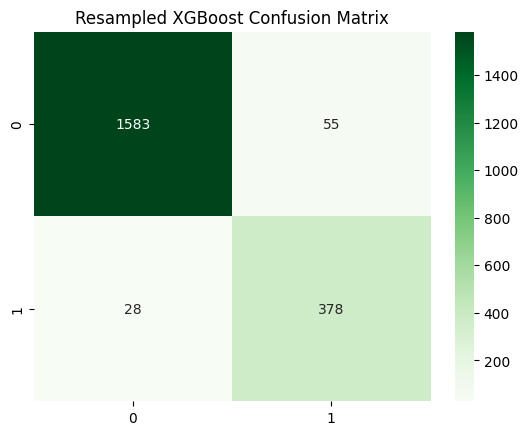

Resampled XGBoost AUC: 0.98


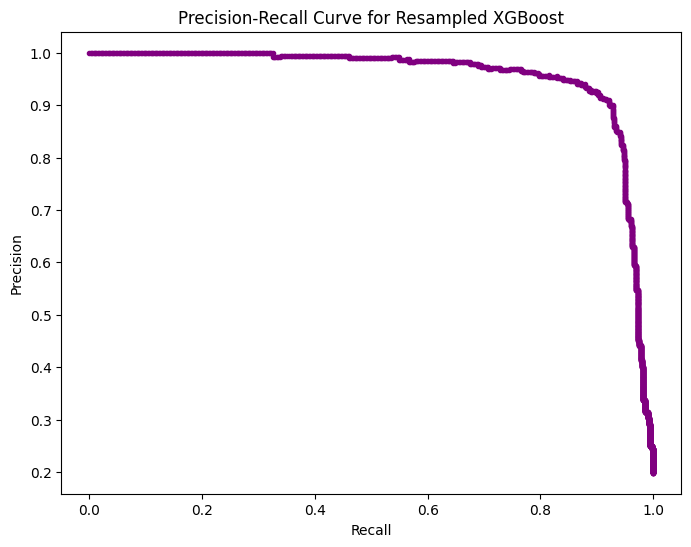

In [38]:
from imblearn.combine import SMOTEENN
from imblearn.pipeline import Pipeline

# Create SMOTE-ENN pipeline
smote_enn = SMOTEENN(random_state=42)

# Resample training data
X_train_resampled, y_train_resampled = smote_enn.fit_resample(X_train, y_train)

# Fit XGBoost model to the resampled data
xgb_model_resampled = XGBClassifier(random_state=42, use_label_encoder=False)
xgb_model_resampled.fit(X_train_resampled, y_train_resampled)

# Predict and evaluate
y_pred_xgb_resampled = xgb_model_resampled.predict(X_test)
y_pred_proba_xgb_resampled = xgb_model_resampled.predict_proba(X_test)[:, 1]

# Evaluation metrics for the resampled model
print("Resampled XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb_resampled))

# Confusion Matrix
conf_matrix_xgb_resampled = confusion_matrix(y_test, y_pred_xgb_resampled)
sns.heatmap(conf_matrix_xgb_resampled, annot=True, fmt='d', cmap='Greens')
plt.title('Resampled XGBoost Confusion Matrix')
plt.show()

# ROC-AUC Score
roc_auc_xgb_resampled = roc_auc_score(y_test, y_pred_proba_xgb_resampled)
print(f"Resampled XGBoost AUC: {roc_auc_xgb_resampled:.2f}")

# Precision-Recall curve for resampled data
precision_resampled, recall_resampled, _ = precision_recall_curve(y_test, y_pred_proba_xgb_resampled)

plt.figure(figsize=(8, 6))
plt.plot(recall_resampled, precision_resampled, marker='.', color='purple')
plt.title('Precision-Recall Curve for Resampled XGBoost')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()


<Figure size 1000x600 with 0 Axes>

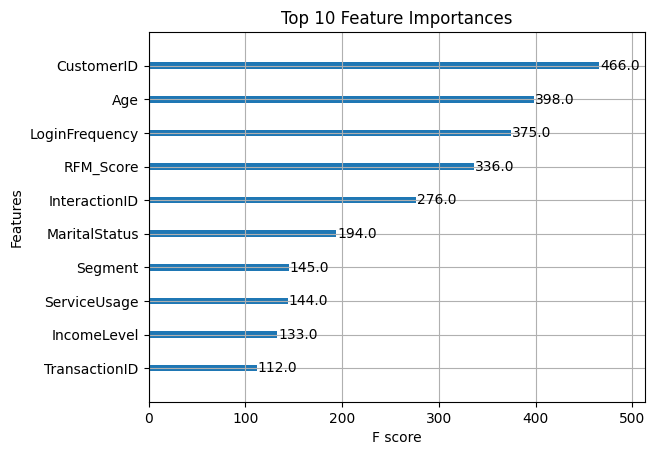

<Figure size 1000x600 with 0 Axes>

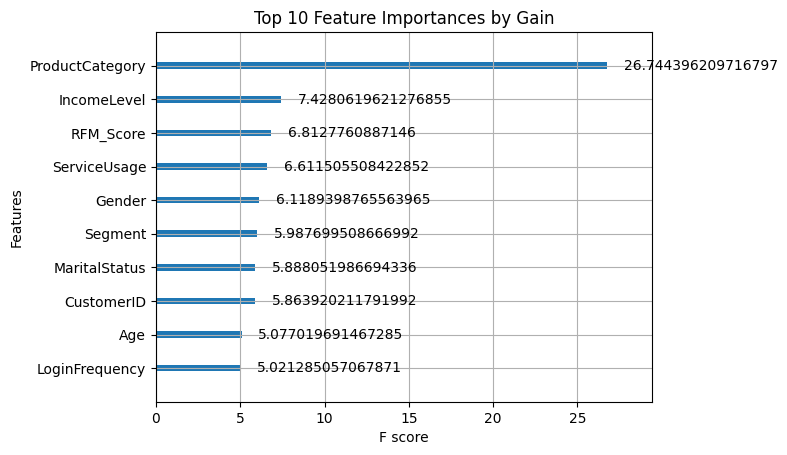

In [39]:
import matplotlib.pyplot as plt
from xgboost import plot_importance

# Plot the feature importance of the trained model
plt.figure(figsize=(10, 6))
plot_importance(xgb_model_resampled, importance_type='weight', max_num_features=10, title="Top 10 Feature Importances")
plt.show()

# Alternatively, you can use the 'gain' importance type to see the contribution of each feature to the model's decision
plt.figure(figsize=(10, 6))
plot_importance(xgb_model_resampled, importance_type='gain', max_num_features=10, title="Top 10 Feature Importances by Gain")
plt.show()
